# Probability & Statistics 3 

Relationship between Distribution, PMF, PDF, CDF.
The Normal distribution.

![distributions](https://lipyeow.github.io/cis705f18/morea/stats/distfn.png)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import pprint

conn = sqlite3.connect('nsfg.db')
curs = conn.cursor()

# find distinct values for the birthwgt_lb1 column
curs.execute('SELECT DISTINCT(birthwgt_lb1) FROM fempreg ORDER BY birthwgt_lb1;')
print( np.array(curs.fetchall()).flatten() )

[None 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 17 98 99]


## Frequency Distribution

Find the birth weight of the first baby born in each pregnancy and plot the distribution.

Let $X$ be the (continuous) random variable representing the birth weight of the first baby born in each pregnancy. Note that $X$ is defined over the "event space" of "pregnancies" (as sampled and reported in the NSFG data set).

Let $N(x_1<X\leq x_2)$ represent the number of first babies with birth weight between $x_1$ and $x_2$.

This histogram for the occurrence counts is essentially a set of counts 

$\{ N(x_1<X\leq x_2),$ 

$ N(x_2<X\leq x_3), $

$\ldots, $

$ N(x_n<X\leq x_{n+1})\} $

over $n$ bins where each bin's width is defined by the interval $(x_i,x_{i+1}]$ (strictly speaking the bins at the two extreme ends need to go to negative and positive infinity).

(6390,)


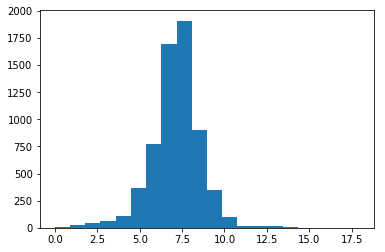

In [4]:
# find actual birth weight

curs.execute('SELECT birthwgt_lb1 + (birthwgt_oz1/16.0) '
             + 'FROM fempreg WHERE birthwgt_lb1 is not null '
             + 'AND birthwgt_oz1 is not null '
             + 'AND birthwgt_lb1 < 25;')

wgt = np.array(curs.fetchall()).flatten()

print(wgt.shape)

#plt.rcParams['figure.figsize'] = [10, 8]

plt.hist(wgt, bins=20)
plt.show()

## Probability Mass Function

Find the PMF and plot it. Numpy has a nifty function to do this.

As a general convention, variables in caps represent random variables, letters in lowercase represent "values" (not a variable). 

If the random variable $X$ takes discrete values $\{ 1,2,\ldots, x, \ldots,k \}$, then the PMF represents

$P(X = x) = $ the probability that the r.v. $X$ takes the value $x$.

From the computation side, we often plot PMF as histograms especially when the set of discrete values is too numerous. Histograms approximate the PMF by aggregating the PMF into bins (think "group by" in SQL). 

Essentially the bins of the histogram are normalized so that they represent probabilities:

$ P(x_i <X \leq x_{i+1}) = \frac{N(x_i <X \leq x_{i+1})}{N(-\infty < X < \infty)} $

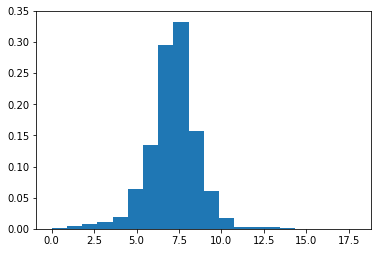

In [13]:

hist = np.histogram(wgt, bins=20)

#pprint.pprint(hist)

pmf = np.histogram(wgt, bins=20, density=True)    
#pprint.pprint(pmf)

# plt.hist uses np.histogram underneath the covers
plt.hist(wgt, bins=20, normed=True)

plt.show()

## Probability Density Function

The PMF of the sample looks [normal](https://en.wikipedia.org/wiki/Normal_distribution), so we can fit a normal PDF to it and plot it.

We are going to use the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) package.

Where as histograms are represented using discrete number of bins, PDF is smooth!

A normal distribution can be fully described in just two numbers/parameters:

* the mean $\mu$
* the standard deviation $\sigma$

So we write a random variable $X$ follows the normal distribution with mean $\mu$ and standard deviation $\sigma$ as

$ X \sim N(\mu, \sigma) $

Take a look at the wikipedia page to see how $\mu$ and $\sigma$ affects the shape of the Normal PDF curve (or you can also plot it with different values of $\mu$ and $\sigma$).


[  2.45379489e-06   1.22036121e-05   5.38689650e-05   2.11051755e-04
   7.33904253e-04   2.26511336e-03   6.20498275e-03   1.50865979e-02
   3.25568330e-02   6.23581308e-02   1.06009339e-01   1.59954058e-01
   2.14213333e-01   2.54623121e-01   2.68626760e-01   2.51536382e-01
   2.09051095e-01   1.54207034e-01   1.00961553e-01   5.86689017e-02
   3.02593779e-02   1.38519888e-02   5.62813322e-03   2.02962922e-03
   6.49634593e-04   1.84553243e-04   4.65344213e-05   1.04142273e-05
   2.06861606e-06   3.64697535e-07   5.70671082e-08   7.92572506e-09
   9.76994772e-10   1.06892092e-10   1.03800397e-11   8.94648733e-13
   6.84393992e-14   4.64686361e-15   2.80035934e-16   1.49784785e-17]


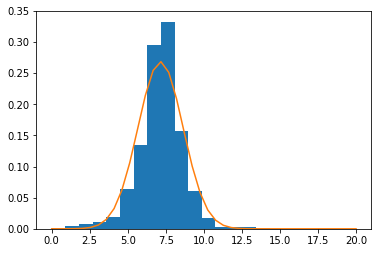

In [11]:
m = np.mean(wgt)
std = np.std(wgt)

# generate a grid of x values (ie birth weight)
x = np.linspace(0,20, num=40)

# set the normal distribution params
rv = stats.norm(m, scale=std)

# generate the probabilities at each x value grid point
pdf = rv.pdf(x)

print(pdf)

plt.hist(wgt, bins=20, normed=True)
plt.plot(x, pdf)

plt.show()




## Cumulative Distribution Function

matplotlib has a nifty way for plotting the CDF (discrete)

For discrete random variables, the CMF/CDF represents

$P(X \leq x) = \sum_{i=1}^{x} P(X = i)$

We can perform the above summation for the histogram approximation of the PMF to get a cumulative histogram that approximates the CMF.

For continuous random variables with PDF function $f(x)$, the CDF represents

$P(X \leq x) = \int_{-\infty}^{x} f(x) \quad dx$


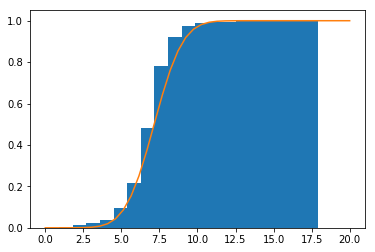

In [12]:
plt.hist(wgt, bins=20, normed=True, cumulative=True)

cdf = rv.cdf(x)
plt.plot(x, cdf)

plt.show()

Note how CDFs can be used to generate random variates from a particular distribution.